# 01. Data

In [ ]:
!pip install yfinance

In [2]:
from datetime import datetime, timedelta

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import yfinance as yf

sns.set()
pd.options.display.float_format = '{:.4f}'.format 

In [3]:
n_years = 5

## 01.01. Close Values

In [4]:
def get_close_values(symbols,n_years):
  end = datetime.now()
  start = end - timedelta(days = 365 * n_years)
  data = yf.download(symbols,start,end)
  return data['Close'].copy()

In [5]:
symbols = ['VWO','PDBC','SPY','VTWO','ESGU','QQQ','VTI','SCHD','VCLT']
close = get_close_values(symbols,n_years)
close.describe()

[*********************100%***********************]  9 of 9 completed


,ESGU,PDBC,QQQ,SCHD,SPY,VCLT,VTI,VTWO,VWO
count,1260.0000,1260.0000,1260.0000,1260.0000,1260.0000,1260.0000,1260.0000,1260.0000,1260.0000
mean,70.2821,16.6046,222.9704,56.3775,314.1745,97.5973,161.3799,66.9762,44.3783
std,16.4349,2.1872,79.9174,10.6392,67.3966,8.0099,35.2075,12.8884,4.9921
min,49.5600,11.2200,123.3500,39.5000,222.9500,78.7000,111.9100,40.0300,30.4600
25%,58.3925,15.5575,163.4025,49.2350,266.5475,90.2775,136.9650,58.9250,40.7400
50%,63.9500,16.5500,187.2500,52.7050,289.9000,96.5000,148.3750,62.4625,43.3800
75%,79.2300,17.8150,287.6575,58.8425,347.3425,105.3100,176.9500,68.6100,47.9700
max,108.4600,22.7100,403.9900,81.9400,477.7100,112.9600,242.9700,98.0100,56.4900


## 01.02. Log Return Values

In [6]:
def get_log_returns(close):
  log_returns = np.log(close/close.shift())
  return log_returns

In [7]:
log_returns = get_log_returns(close)
log_returns.describe()

,ESGU,PDBC,QQQ,SCHD,SPY,VCLT,VTI,VTWO,VWO
count,1259.0000,1259.0000,1259.0000,1259.0000,1259.0000,1259.0000,1259.0000,1259.0000,1259.0000
mean,0.0006,-0.0001,0.0009,0.0005,0.0005,0.0001,0.0005,0.0003,0.0002
std,0.0123,0.0142,0.0142,0.0120,0.0120,0.0082,0.0122,0.0153,0.0131
min,-0.1279,-0.3088,-0.1276,-0.1048,-0.1159,-0.0924,-0.1208,-0.1447,-0.1288
25%,-0.0028,-0.0049,-0.0043,-0.0036,-0.0031,-0.0031,-0.0032,-0.0059,-0.0059
50%,0.0003,0.0012,0.0016,0.0011,0.0008,0.0003,0.0008,0.0010,0.0012
75%,0.0055,0.0062,0.0077,0.0053,0.0058,0.0036,0.0059,0.0075,0.0072
max,0.0925,0.0424,0.0813,0.0843,0.0867,0.0937,0.0907,0.0919,0.0677


## 01.03. Return & Risk

In [8]:
summary = log_returns.agg(['mean','std']).T
summary.columns = ['Mean','Std']
summary

,Mean,Std
ESGU,0.0006,0.0123
PDBC,-0.0001,0.0142
QQQ,0.0009,0.0142
SCHD,0.0005,0.0120
SPY,0.0005,0.0120
VCLT,0.0001,0.0082
VTI,0.0005,0.0122
VTWO,0.0003,0.0153
VWO,0.0002,0.0131


## 01.04. Annualizing Return & Risk


It is common to annualize the return and risk. It's more meaningful and it fixes the problem if the data came from different timeframes (daily data / monthly data / ...)

In [9]:
summary['Ann_Mean'] = summary['Mean'] * 250
summary['Ann_Std'] = summary['Std'] * np.sqrt(250)
summary

,Mean,Std,Ann_Mean,Ann_Std
ESGU,0.0006,0.0123,0.1410,0.1940
PDBC,-0.0001,0.0142,-0.0294,0.2249
QQQ,0.0009,0.0142,0.2134,0.2250
SCHD,0.0005,0.0120,0.1184,0.1900
SPY,0.0005,0.0120,0.1354,0.1902
VCLT,0.0001,0.0082,0.0244,0.1300
VTI,0.0005,0.0122,0.1310,0.1933
VTWO,0.0003,0.0153,0.0834,0.2416
VWO,0.0002,0.0131,0.0578,0.2070


# 02. Covariance and correlation

We need to identify if assets/instruments **move togueter** and to what extent? 

## 02.01. Correlation Coefficient

* **0** No correlation
* **>0** Moving togueter
* **<0** Moving in opposite directions

### Portfolio Diversification Effect

In Portfolio Management it is beneficial to have assets with low/no/neg correlation 

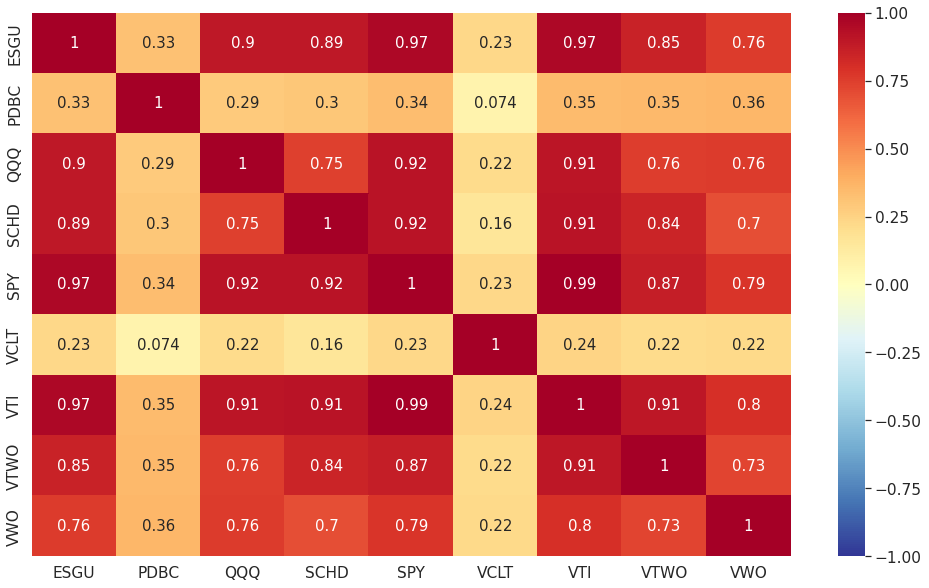

In [15]:
log_returns.corr()
plt.figure(figsize=(17,10))
sns.set(font_scale=1.4)
sns.heatmap(log_returns.corr(),cmap = "RdYlBu_r",annot = True,annot_kws={"size":15},vmin = -1,vmax = 1)
plt.show()